<a href="https://colab.research.google.com/github/GomesThainara/qm-academy/blob/master/CopaDoMundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Leituras de Dados com Pandas

In [101]:
rankings = pd.read_csv('/content/fifa_ranking.csv')
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings = rankings.replace({"IR Iran": "Iran"})
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

matches = pd.read_csv('/content/results.csv')
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'])

world_cup = pd.read_csv('/content/World Cup 2018 Dataset.csv')
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})

#Visualizações dos 5 primeiros dados de cada CSV

In [102]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0


In [103]:
matches.head

<bound method NDFrame.head of             date      home_team away_team  home_score  away_score  \
0     1872-11-30       Scotland   England           0           0   
1     1873-03-08        England  Scotland           4           2   
2     1874-03-07       Scotland   England           2           1   
3     1875-03-06        England  Scotland           2           2   
4     1876-03-04       Scotland   England           3           0   
...          ...            ...       ...         ...         ...   
43747 2022-06-14        Moldova   Andorra           2           1   
43748 2022-06-14  Liechtenstein    Latvia           0           2   
43749 2022-06-14          Chile     Ghana           0           0   
43750 2022-06-14          Japan   Tunisia           0           3   
43751 2022-06-14    South Korea     Egypt           4           1   

                tournament      city        country  neutral  
0                 Friendly   Glasgow       Scotland    False  
1              

In [104]:
world_cup.head()

,Team,Group,First match \nagainst,Second match\n against,Third match\n against
0,Russia,A,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,Russia,Uruguay,Egypt
2,Egypt,A,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,Egypt,Saudi Arabia,Russia
4,Portugal,B,Spain,Morocco,Iran


#Verificação de torneios que temos no nosso cojunto de dados


In [105]:
matches['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

#Deletando jogos amistosos entre times no nossos dados

In [106]:
matches = matches[matches['tournament'] != 'Friendly']
matches.shape

(26390, 9)

#Eliminando colunas redundantes e agrupando pontos médios por ano

In [107]:
import datetime

rankings['year'] = rankings['rank_date'].dt.year
matches['year'] = matches['date'].dt.year

rankings_sub = rankings[rankings['rank_date'] > '2011-08-24']
matches_sub = matches[matches['date'] > '2011-08-24']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [108]:
rankings_sub = rankings_sub[['rank', 'country_full', 'weighted_points', 'year']]
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'weighted_points': 'mean'})

matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33492,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33494,2011-08-27,New Caledonia,Vanuatu,5,0,Pacific Games,Nouméa,New Caledonia,False,2011
33496,2011-08-27,Papua New Guinea,Cook Islands,4,0,Pacific Games,Boulari,New Caledonia,True,2011
33497,2011-08-27,Solomon Islands,Guam,7,0,Pacific Games,Nouméa,New Caledonia,True,2011
33498,2011-08-27,Tuvalu,American Samoa,4,0,Pacific Games,Nouméa,New Caledonia,True,2011


#Mesclar partidas e classificações por ano

In [109]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,rank_x,weighted_points_x,rank_y,weighted_points_y
0,Fiji,Tahiti,3,0,True,153.75,145.7750,183.0,64.9125
1,New Caledonia,Tahiti,3,1,False,160.00,118.6800,183.0,64.9125
2,New Caledonia,Vanuatu,5,0,False,160.00,118.6800,173.0,92.0500
3,American Samoa,Vanuatu,0,8,True,199.00,15.1775,173.0,92.0500
4,Guam,Vanuatu,1,4,True,188.50,35.8500,173.0,92.0500


In [110]:
matches_all['weighted_diff'] = matches_all['weighted_points_x'] - matches_all['weighted_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,rank_x,weighted_points_x,rank_y,weighted_points_y,weighted_diff,rank_diff,is_win
0,1,153.75,145.7750,183.0,64.9125,80.8625,-29.25,1
1,0,160.00,118.6800,183.0,64.9125,53.7675,-23.00,1
2,0,160.00,118.6800,173.0,92.0500,26.6300,-13.00,1
3,1,199.00,15.1775,173.0,92.0500,-76.8725,26.00,0
4,1,188.50,35.8500,173.0,92.0500,-56.2000,15.50,0


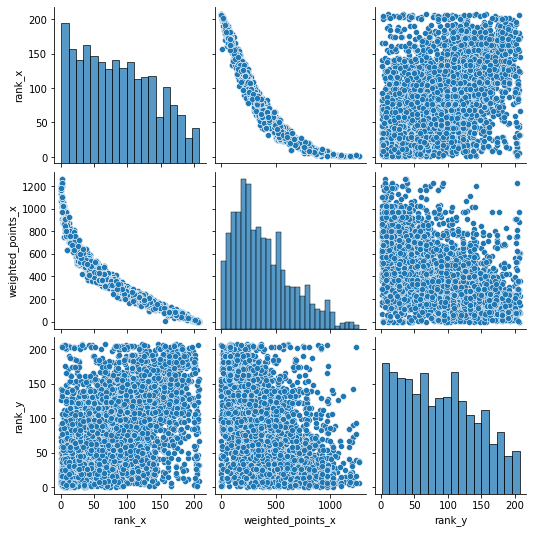

In [111]:
sns.pairplot(matches_all.loc[:,'rank_x':'rank_y'])
plt.show()

#Treinando nosso modelo usando como base os jogos da copa do mundo de 2018 com dados do ranking da fifa de melhores seleções de todos os tempos

In [112]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

In [113]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [114]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running Random Forest
Running LightGBM
Running Logistic Regression


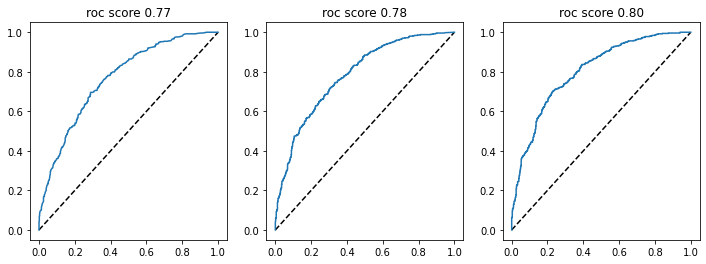

In [115]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print('Running', name)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

#Verificando como a probabilidade mais alta se relaciona com a vitória

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


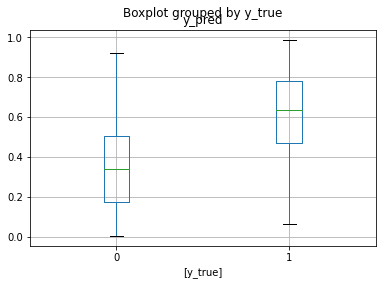

In [116]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

#Previsão calculando a média de 3 modelos

In [117]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

#Simulação da Fase de Grupos

In [118]:
world_cup_rankings = world_cup[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2018], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

,Group,year,rank,weighted_points
Team,,,,
Russia,A,2018,64.666667,417.961667
Saudi Arabia,A,2018,67.000000,313.558333
Egypt,A,2018,42.333333,408.813333
Uruguay,A,2018,19.000000,682.571667
Portugal,B,2018,3.500000,1005.245000


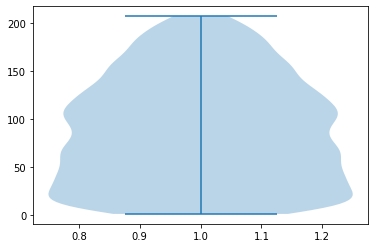

In [119]:
y = matches_all['rank_y']
plt.violinplot(y)

plt.show()

In [120]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print('########################')
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = world_cup_rankings.loc[home, 'weighted_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['weighted_points_y'] = world_cup_rankings.loc[away, 'weighted_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print('Draw')
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print('{} wins!'.format(home))
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print('{} wins!'.format(away))

*******************************
Simulating Group A
########################
Russia vs Saudi Arabia
Russia wins!
########################
Russia vs Egypt
Draw
########################
Russia vs Uruguay
Uruguay wins!
########################
Saudi Arabia vs Egypt
Draw
########################
Saudi Arabia vs Uruguay
Uruguay wins!
########################
Egypt vs Uruguay
Uruguay wins!
*******************************
Simulating Group B
########################
Portugal vs Spain
Portugal wins!
########################
Portugal vs Morocco
Portugal wins!
########################
Portugal vs Iran
Portugal wins!
########################
Spain vs Morocco
Draw
########################
Spain vs Iran
Iran wins!
########################
Morocco vs Iran
Iran wins!
*******************************
Simulating Group C
########################
France vs Australia
Australia wins!
########################
France vs Peru
Draw
########################
France vs Denmark
France wins!
########################
A

#Pontos após a fase de grupos

In [121]:
world_cup_rankings

,Group,year,rank,weighted_points,Points
Team,,,,,
Russia,A,2018,64.666667,417.961667,4
Saudi Arabia,A,2018,67.000000,313.558333,1
Egypt,A,2018,42.333333,408.813333,2
Uruguay,A,2018,19.000000,682.571667,9
Portugal,B,2018,3.500000,1005.245000,9
Spain,B,2018,7.333333,912.925000,1
Morocco,B,2018,41.333333,504.263333,1
Iran,B,2018,34.833333,520.541667,6
France,C,2018,8.000000,755.330000,4


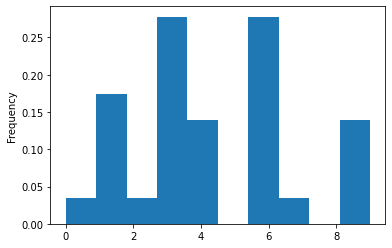

In [122]:
world_cup_rankings['Points'].plot(kind='hist', density=True)
plt.show()

#Simulação de rodadas de eliminação única

In [123]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,rank,weighted_points,Points
Team,,,,,
Uruguay,A,2018,19.000000,682.571667,9
Russia,A,2018,64.666667,417.961667,4
Portugal,B,2018,3.500000,1005.245000,9
Iran,B,2018,34.833333,520.541667,6
Denmark,C,2018,12.000000,926.571667,6
France,C,2018,8.000000,755.330000,4
Croatia,D,2018,16.833333,706.773333,7
Nigeria,D,2018,49.500000,405.183333,6
Serbia,E,2018,34.833333,575.070000,9


#Simulação das rodadas de quartas de finais,semifinal e final

In [124]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [125]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['weighted_points_x'] = final_teams.loc[home, 'weighted_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['weighted_points_y'] = final_teams.loc[away, 'weighted_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['weighted_diff'] = row['weighted_points_x'] - row['weighted_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
         # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print('{} wins!'.format(home))
        else:
            winners.append(away)
            print('{} wins!'.format(away))
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Uruguay vs Iran
Uruguay wins!
Denmark vs Nigeria
Denmark wins!
Russia vs Portugal
Portugal wins!
France vs Croatia
France wins!
Serbia vs Germany
Germany wins!
Belgium vs Senegal
Belgium wins!
Costa Rica vs Mexico
Mexico wins!
Tunisia vs Poland
Tunisia wins!
######################################
Simulation of quarterfinal
Uruguay vs Denmark
Denmark wins!
Portugal vs France
France wins!
Germany vs Belgium
Belgium wins!
Mexico vs Tunisia
Mexico wins!
######################################
Simulation of semifinal
Denmark vs France
Denmark wins!
Belgium vs Mexico
Belgium wins!
######################################
Simulation of final
Denmark vs Belgium
Belgium wins!
*******************************
The Champion World Cup is Belgium!!!!!!!!!!!!!!!!!!!!!!!
